# KNN & PCA

1.What is K-Nearest Neighborn (KNN) and how does it work?
  - KNN is a non-parametric, lazy learning algorithm used for classification and regression. It works by finding the k closest data points(neighbors) to a query point using a distance metric and making predictions based on the majority label (for classification) or average vallue (for regression) of those neighbors.

2.What is the difference between KNN Classification and KNN Regression?
  - Classofocation: Predicts the class label based on the majority vote of neighborns.
  - Regression: Predicts a continuous value by averaging the neighbors' values.

3.What it the role of the distance metric in KNN?
  - **Role of Distance Metric in KNN:**The distance metric (e.g., Euclidean, Manhattan, Minkowski) measures how similar or dissimilar two points are. It plays a cruial role in determining the neighbors.

4.What is the Curse of Dimensionality in KNN?
  - In high-dimensional spaces, distances between point become less meaningful because all points tend to look equidistant. This degrades KNNs performance.

5.How can we choose the best value of K in KNN?
  - Use techniques like cross-validation to fine the optimal k. A small k can be noisy, while a large k might smooth out important patterns.

6.What are KD Tree and Ball Tree in KNN?
  - They are data structues to speed up neighbor search:
    - **KD Tree**: Splits data based on median values along axis-aligned hyperplanes.
    - **Ball Tree**: Uses hyperspheres to group points, better for higher dimensions.

7.When should you use KD Tree vs. Ball Tree?
  - **KD Tree**: Efficient for low-dimensional data.
  - **Ball Tree**: Better for moderate to high-dimensional data.

8.What are the disadvantage of KNN?
  - Slow with large datasets.
  - Sensitive to irrelevant features and scale.
  - Requires storage of all training data.
  

9.How does feature scaling affect KNN?
  - Essential because KNN relies on distances. Without scaling, features with large ranges can dominate distance computations.

10.What is PCA (Principal Component Analysis)?
  - PCA is a dimensionality reduction technique that transformas feature into a new set of orthogonal components (principa components), ordered by the amount of variance they capture.

11.How does PCA work?
  - Standardize the data
  - Compute covariance matrix
  - compute eigenvalues and eigenvectors
  - Project data onto the top k eigenvector (principal components)

12.What is the geometric intuition behind PCA?
  - **Geometric Intuition pf PCA**: PCA finds new axes (directions) where the data variance is maximized. These axes are orthogonal and capture most of the data's information.

13.What is the difference between Feature Selection and Feature Extraction?
  - **Feature Selection vs. Feature Extraction:**
    - **Selection**: Keeps original features (e.g., removing unimportant ones).
    - **Extraction**: Creates new features (e.g., PCA, which combines feature into components).

14.What are Eigenvalues and Eigenvector in PCA?
  - **Eigenvalues and Eigenvectors in PCA:**
    - **Eigenvectors**: Directions of principal components.
    - **Eigenvalues:** Magnitude of variance explained by each component.

15.How do you decide the number of components to keep in PCA?
  - **Choosing Number of Components in PCA:**
   Use the** explained variance ratio **(e.g., cumulative sum >= 95%) or a **scree plot** to decide how many components to retain.

16.Can PCA be used foe classifier?
  - Indirectly, yes. PCA is used to reduce dimensions before applying a classifier like KNN, SVM, etc.

17.What are the limitation of PCA?
  - Assumes linear relationship.
  - Sensitive to scale and outliers.
  - Components may not be interpretable.


18.How do KNN and PCA complement each other?
  - PCA reduces dimensionality and noise, improving KNN's performance by making distance computations more meaningful and faster.
  

19.How does KNN handle missing values in a dataset?
  - Remove rows with missing data.
  - Impute values (e.g., KNN imputer, mean/median)

20.What are the key differences between PCA and Limear Discrimant Analysis (LDA)?
  - **PCA**: Unsuoervised, maximizes variance.
  - **LDA**: Supercised, maximizes class separability.
  - **PCA** work on features only, LDA uses class labels.

# Practical

21.Train a KNN Classifier on the Iris dataset and print model accuracy.

In [28]:
# prompt: 21.Train a KNN Classifier on the Iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # You can change the value of n_neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy}")


Accuracy of KNN classifier: 1.0


22.Train a KNN Regressor on a sythetic dataset and evaluate using Mean Squared Error (MSE)?

In [27]:
# prompt: 22.Train a KNN Regressor on a sythetic dataset and evaluate using Mean Squared Error (MSE)?

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.3, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.6799468730888507


23.Train a KNN Classifier using different distance metrics (Euclidearn and Manhattan) and compare accuracy.

In [29]:
# prompt: 23.Train a KNN Classifier using different distance metrics (Euclidearn and Manhattan) and compare accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (if not already loaded)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Accuracy with Euclidean distance: {accuracy_euclidean}")

# Train KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy with Manhattan distance: {accuracy_manhattan}")

Accuracy with Euclidean distance: 1.0
Accuracy with Manhattan distance: 1.0


24.Train a KNN Classifier with different values of k and visualize decision boundaries.

In [30]:
# prompt: 24.Train a KNN Classifier with different values of k and visualize decision boundaries.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns # import seaborn for scatterplot
from sklearn.datasets import load_iris # import load_iris for the dataset
from sklearn.model_selection import train_test_split # import train_test_split
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier



# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

def plot_decision_boundary(knn, X, y, title):
    # Step size in the mesh
    h = .02

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_

25.Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [32]:
# prompt: 25.Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scale the features using StandardScaler
scaler = StandardScaler()  # Create a new StandardScaler instance for the current dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {accuracy_scaled}")

# Train KNN on unscaled data for comparison
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy with unscaled data: {accuracy_unscaled}")

Accuracy with scaled data: 1.0
Accuracy with unscaled data: 1.0


26.Train a PCA model on sythetic data and print the explained variance ratio for each component.

In [23]:
# prompt: 26.Train a PCA model on sythetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA
import numpy as np

# Generate synthetic data (example)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Initialize PCA with the desired number of components
pca = PCA(n_components=3) # You can change the number of components

# Fit PCA on the data
pca.fit(X)

# Print the explained variance ratio for each component
print("Explained Variance Ratio per component:")
pca.explained_variance_ratio_


Explained Variance Ratio per component:


array([0.25651713, 0.24134752, 0.20674174])

27.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [33]:
# prompt: 27.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

# Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize PCA with a desired number of components (e.g., 2)
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with PCA: {accuracy_pca}")

# Assuming 'accuracy' was calculated in a previous cell with unscaled data
# If not, you need to calculate it here:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy without PCA: {accuracy}")

Accuracy with PCA: 1.0
Accuracy without PCA: 1.0


28.Perform Hyperparameter Tuning on a KKNN Classifier using GridSearchCV.

In [34]:
# prompt: 28.Perform Hyperparameter Tuning on a KKNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris # Add this line to load the iris dataset
from sklearn.model_selection import train_test_split # Add this to split the data


# Load the Iris dataset to ensure X_train and y_train are consistent
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for k
    'weights': ['uniform', 'distance'],  # Example values for weights
    'metric': ['euclidean', 'manhattan']  # Example values for distance metrics
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.9523809523809523
Test Accuracy: 1.0


29.Train a KNN Classifier and visualize the cumulative explained variance.

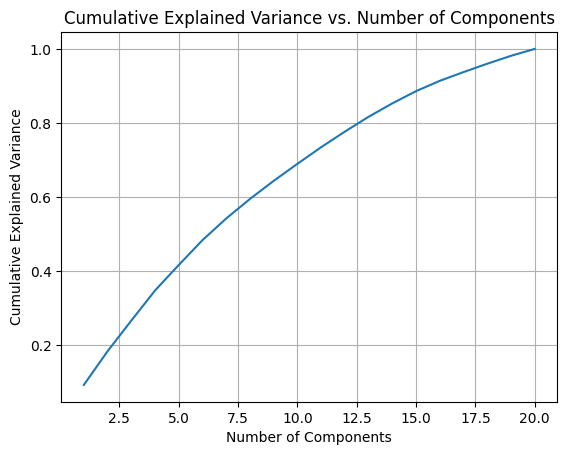

In [20]:
# prompt: 29.Train a KNN Classifier and visualize the cumulative explained variance.

import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is your training data
pca = PCA()
pca.fit(X_train)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


30.Train a PCA modedl and visualize the cumulative explained variance.

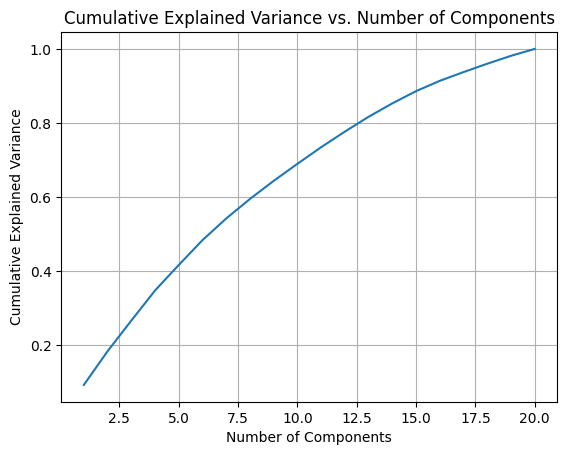

In [19]:
# prompt: 30.Train a PCA modedl and visualize the cumulative explained variance.

import matplotlib.pyplot as plt
import numpy as np
# Assuming X_train is your training data
pca = PCA()
pca.fit(X_train)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


31.Train a KNN Classifier using defferent values of the weights parameter (uniform vs. distance) and compare accuracy.

In [35]:
# prompt: 31.Train a KNN Classifier using defferent values of the weights parameter (uniform vs. distance) and compare accuracy.

# Assuming X and y are your original dataset features and labels
from sklearn.model_selection import train_test_split

# Ensure X_train and y_train have the same number of samples
# by splitting the original dataset before applying different weights

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Correctly split the data

# Train KNN with 'uniform' weights
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
print(f"Accuracy with 'uniform' weights: {accuracy_uniform}")

# Train KNN with 'distance' weights
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)
print(f"Accuracy with 'distance' weights: {accuracy_distance}")

Accuracy with 'uniform' weights: 1.0
Accuracy with 'distance' weights: 1.0


32.Train a KNN Regressor and analyze the effect of different K value on performance.

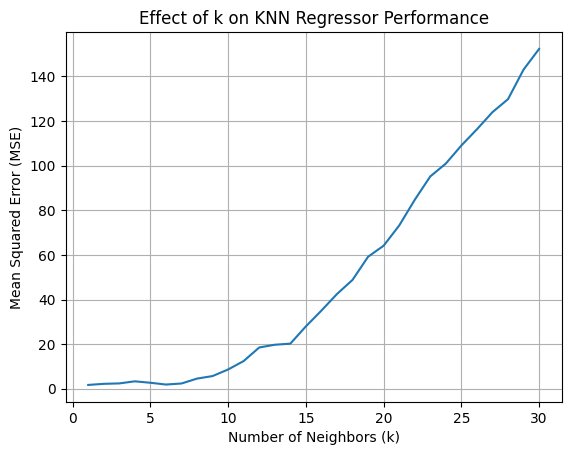

In [36]:
# prompt: 32.Train a KNN Regressor and analyze the effect of different K value on performance.

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # Import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.3, random_state=42)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import mean_squared_error # Import mean_squared_error
mse_values = []
k_values = list(range(1, 31))  # Test k values from 1 to 30

from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values against different k values
plt.plot(k_values, mse_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of k on KNN Regressor Performance")
plt.grid(True)
plt.show()

33.Implement KNN Imputation for handling missing values in a dataset.

In [16]:
# prompt: 33.Implement KNN Imputation for handling missing values in a dataset.

import numpy as np
from sklearn.impute import KNNImputer

# Sample data with missing values (NaN)
data = np.array([
    [1, 2, np.nan, 4],
    [5, np.nan, 7, 8],
    [9, 10, 11, 12],
    [13, 14, np.nan, 16],
    [np.nan, 18, 19, 20]
])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2) # You can adjust the number of neighbors

# Fit and transform the data to impute missing values
imputed_data = imputer.fit_transform(data)

print("Original data with missing values:")
print(data)

print("\nImputed data:")
imputed_data


Original data with missing values:
[[ 1.  2. nan  4.]
 [ 5. nan  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. nan 16.]
 [nan 18. 19. 20.]]

Imputed data:


array([[ 1.,  2.,  9.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.],
       [11., 18., 19., 20.]])

34.Train a PCA model and visualize the data projection onto the first two principal components.

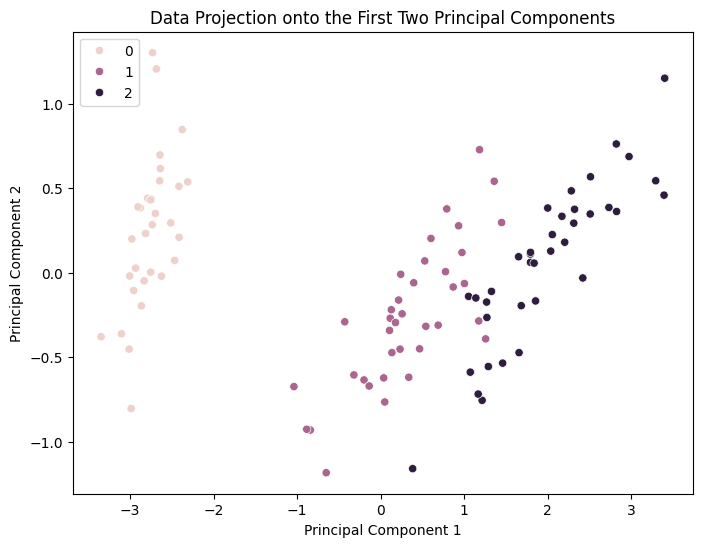

In [37]:
# prompt: 34.Train a PCA model and visualize the data projection onto the first two principal components.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split to regenerate consistent data
from sklearn.datasets import load_iris # Import load_iris to regenerate consistent data

# Load the Iris dataset and split for consistent data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Assuming X_train is your training data (e.g., from the Iris dataset)
pca = PCA(n_components=2) # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train)

# Visualize the data projection
plt.figure(figsize=(8, 6))
# Use y_train that corresponds to the X_train_pca data
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train) #hue=y_train to color points by their class
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projection onto the First Two Principal Components")
plt.show()

35.Train a KNN Clasiifier using the KD Tree and Ball Tree algorithms and compare performance.

In [38]:
# prompt: 35.Train a KNN Clasiifier using the KD Tree and Ball Tree algorithms and compare performance.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (if not already loaded)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with KDTree
knn_kdtree = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)
print(f"Accuracy with KDTree: {accuracy_kdtree}")

# Train KNN with BallTree
knn_balltree = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)
accuracy_balltree = accuracy_score(y_test, y_pred_balltree)
print(f"Accuracy with BallTree: {accuracy_balltree}")

# Compare performance
print(f"Difference in accuracy: {abs(accuracy_kdtree - accuracy_balltree)}")

Accuracy with KDTree: 1.0
Accuracy with BallTree: 1.0
Difference in accuracy: 0.0


36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

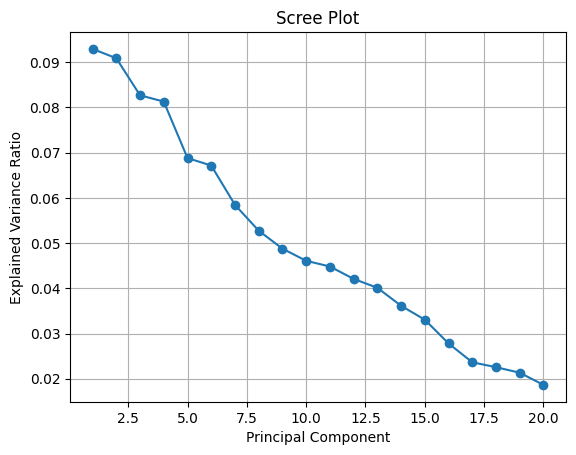

In [13]:
# prompt: 36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming X_train is your high-dimensional training data
# Example: Generate synthetic high-dimensional data
X_train = np.random.rand(100, 20)  # 100 samples, 20 features

# Initialize PCA without specifying the number of components
pca = PCA()
pca.fit(X_train)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


37.Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [12]:
# prompt: 37.Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already trained a KNN classifier (e.g., knn) and made predictions (e.g., y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.7138447971781305
Recall: 0.7222222222222222
F1-score: 0.7164529914529915


38.Train a PCA model and analyze the effect of different numbers of componets on accuracy.

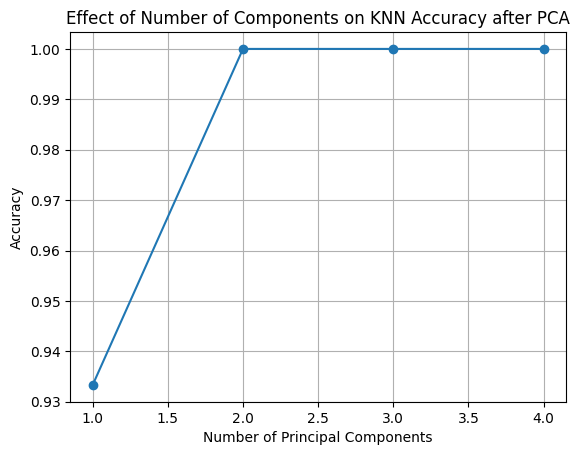

In [39]:
# prompt: 38.Train a PCA model and analyze the effect of different numbers of componets on accuracy.

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # Import accuracy_score
# Assuming X_train, X_test, y_train, y_test are already defined from previous steps.

# Define a range of number of components to test
n_components_range = range(1, X_train.shape[1] + 1) # Test from 1 to the number of features

accuracy_scores = []

for n_components in n_components_range:
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train)

    # Transform the testing data
    X_test_pca = pca.transform(X_test)

    # Train a KNN classifier on the transformed data
    knn = KNeighborsClassifier(n_neighbors=3)  # Or use your preferred hyperparameters
    knn.fit(X_train_pca, y_train)

    # Make predictions on the transformed test data
    y_pred = knn.predict(X_test_pca)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores against the number of components
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of Number of Components on KNN Accuracy after PCA")
plt.grid(True)
plt.show()

39.Train a KNN Classifier with different leaf_size values and compare accuracy.

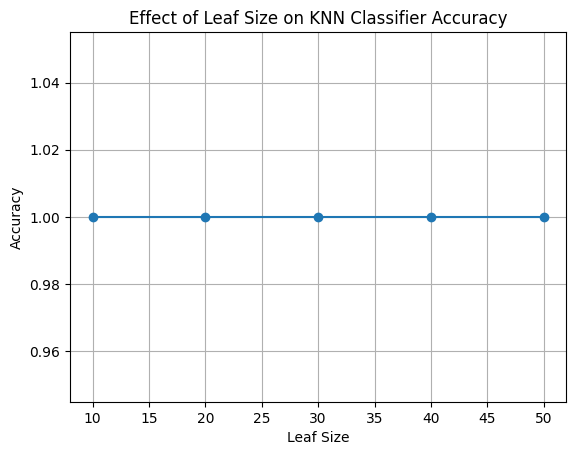

In [41]:
# prompt: 39.Train a KNN Classifier with different leaf_size values and compare accuracy.

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # Import accuracy_score here

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps.

leaf_size_values = [10, 20, 30, 40, 50]  # Example leaf_size values
accuracy_scores = []

for leaf_size in leaf_size_values:
    # Initialize KNN classifier with the current leaf_size
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)  # You might want to adjust n_neighbors

    # Train the classifier
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores against leaf_size values
plt.plot(leaf_size_values, accuracy_scores, marker='o')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Classifier Accuracy")
plt.grid(True)
plt.show()

40.Train a PCA model and visualize how data points are tranformed before and after PCA.

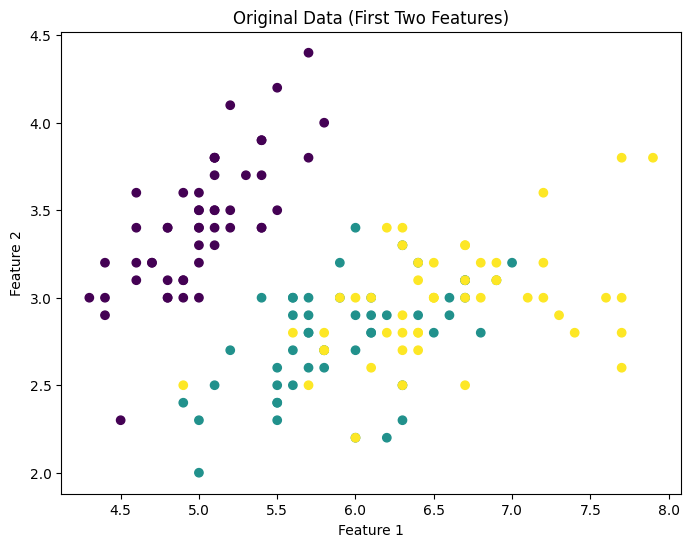

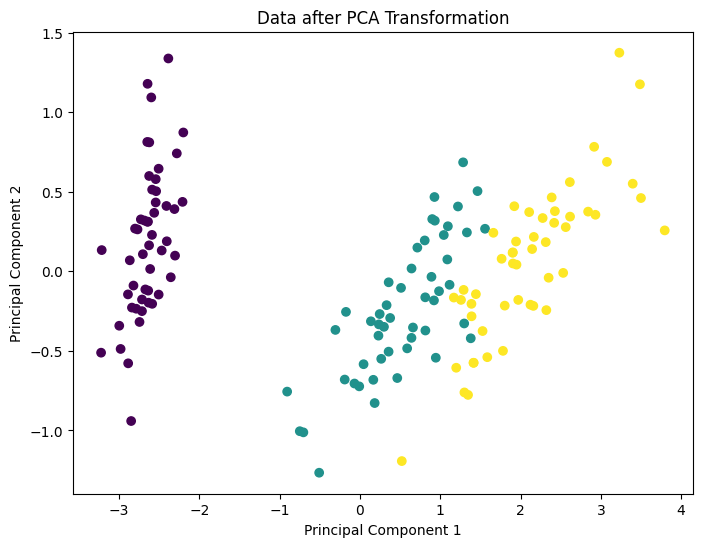

In [9]:
# prompt: 40.Train a PCA model and visualize how data points are tranformed before and after PCA.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the original data (first two features for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot the transformed data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("Data after PCA Transformation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


41.Train a KNN Claddifier on a real-world dataset (Wine dataset) and print classification report.

In [8]:
# prompt: 41.Train a KNN Claddifier on a real-world dataset (Wine dataset) and print classification report.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



42.Train a KNN Regressor and analyze the effect of diferent distance metrics on prediction error.

Mean Squared Error with euclidean metric: 283.5317635350124
Mean Squared Error with manhattan metric: 333.8159312460602
Mean Squared Error with chebyshev metric: 329.60650372046837
Mean Squared Error with minkowski metric: 283.5317635350124


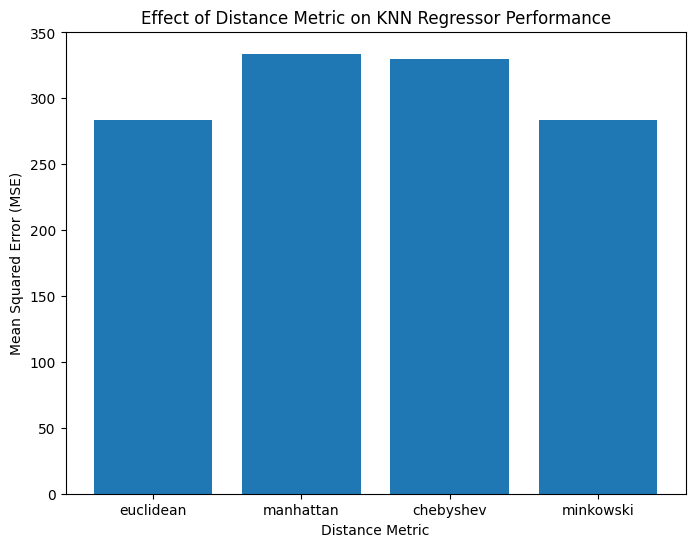

In [43]:
# prompt: 42.Train a KNN Regressor and analyze the effect of diferent distance metrics on prediction error.

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # Import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.3, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
mse_values = []

for metric in metrics:
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"Mean Squared Error with {metric} metric: {mse}")

# Plot MSE for different metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, mse_values)
plt.xlabel("Distance Metric")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Distance Metric on KNN Regressor Performance")
plt.show()

43.Train a KNN Classifier and evaluate using ROC-AUC score.


In [6]:
# prompt: 43.Train a KNN Classifier and evaluate using ROC-AUC score.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
clf = OneVsRestClassifier(knn)
clf.fit(X_train, y_train)

# Make predictions
y_score = clf.predict_proba(X_test)

# Calculate ROC AUC score for each class
roc_auc_scores = roc_auc_score(y_test, y_score, average=None)

# Calculate macro-average ROC AUC score
macro_roc_auc = roc_auc_score(y_test, y_score, average='macro')

print("ROC AUC scores per class:", roc_auc_scores)
print("Macro-average ROC AUC:", macro_roc_auc)


ROC AUC scores per class: [1. 1. 1.]
Macro-average ROC AUC: 1.0


44.Train a PCA modeland visualize the variance captured by each principal component.

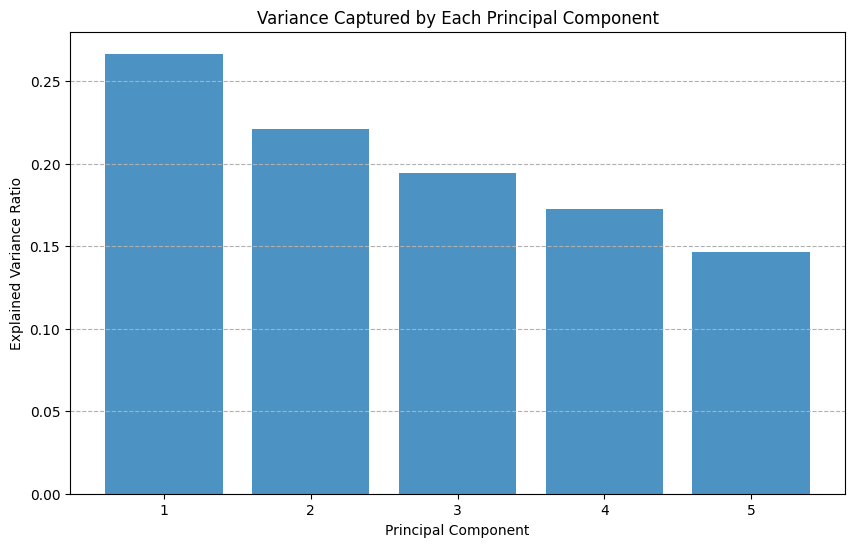

In [5]:
# prompt: 44.Train a PCA modeland visualize the variance captured by each principal component.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train is your training data
pca = PCA()
pca.fit(X_train)

# Get explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--')
plt.show()


45.Train a KNN Classifier and perform feature selection before training.

In [44]:
# prompt: 45.Train a KNN Classifier and perform feature selection before training.

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.datasets import load_iris # import load_iris if not already imported
# Load the Iris dataset (or your dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train KNN classifier on the selected features
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier if not already imported
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_selected, y_train)

# Make predictions
y_pred = knn.predict(X_test_selected)

# Evaluate accuracy
from sklearn.metrics import accuracy_score # import accuracy_score if not already imported
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with feature selection: {accuracy}")

Accuracy with feature selection: 1.0


46.Train a PCA model and visualize the data reconstruction error after reducing dimensions.

Reconstruction error with 2 components: 0.44795268034381813


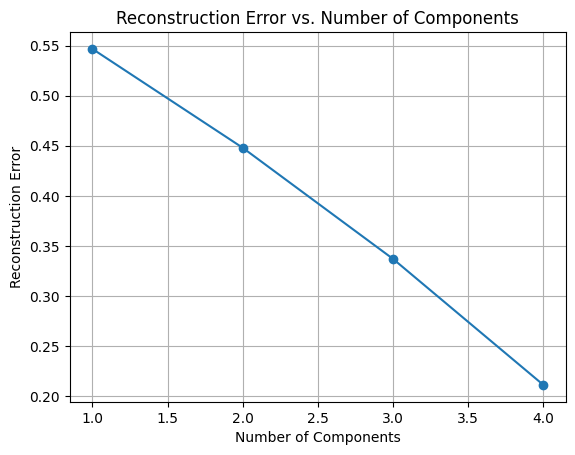

In [3]:
# prompt: 46.Train a PCA model and visualize the data reconstruction error after reducing dimensions.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train is your training data
# Example: Generate synthetic data
X_train = np.random.rand(100, 5)  # 100 samples, 5 features

# Number of components to keep
n_components = 2

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)

# Reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.linalg.norm(X_train - X_train_reconstructed, axis=1))

# Print the reconstruction error
print(f"Reconstruction error with {n_components} components: {reconstruction_error}")

# Visualize the reconstruction error for different number of components (optional)

n_components_range = range(1, X_train.shape[1])
reconstruction_errors = []

for n_comp in n_components_range:
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_train_reconstructed = pca.inverse_transform(X_train_pca)
    error = np.mean(np.linalg.norm(X_train - X_train_reconstructed, axis=1))
    reconstruction_errors.append(error)

plt.plot(n_components_range, reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()


47.Train a KNN Classifier and visualize the decision boundary.

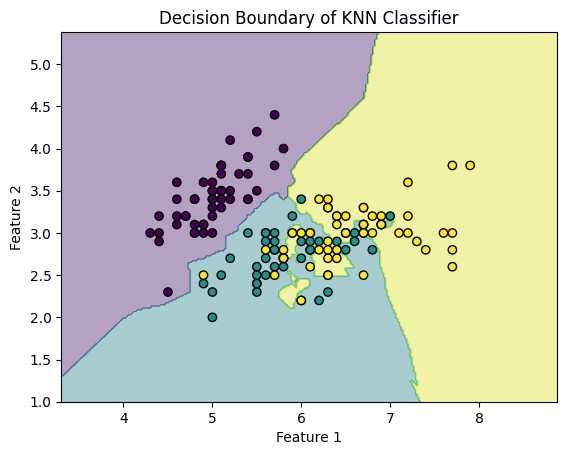

In [45]:
# prompt: 47.Train a KNN Classifier and visualize the decision boundary.

import matplotlib.pyplot as plt
import numpy as np
# Assuming X_train, X_test, y_train, y_test are defined and scaled
# Example using the Iris dataset (replace with your data)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # Import train_test_split
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train a KNN classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of KNN Classifier')
plt.show()

48.Train a PCA model and analyze the effect of different numbers of components on data variance.

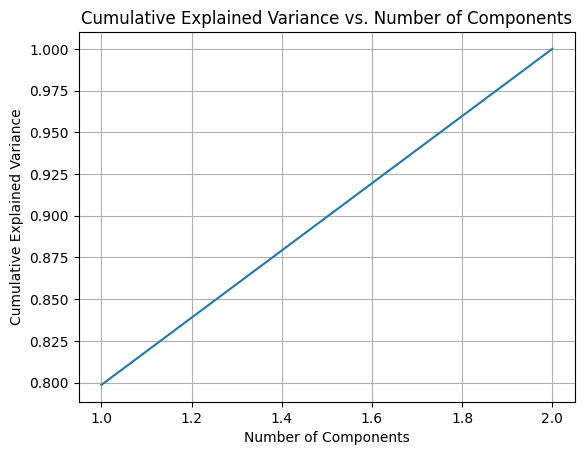

In [46]:
# prompt: 48.Train a PCA model and analyze the effect of different numbers of components on data variance.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your training data
pca = PCA()
pca.fit(X_train)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
